In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
import os
# Prints current working directory.
#os.getcwd()
# Change working directory.
os.chdir("/scratch/w40/gp8431/run")
# List files in the current directory.
#os.listdir()

In [1]:
# Import xarray for data analysis.
import xarray as xr

In [3]:
# In this cell, I will extract the data from the run directory, then move
# into the srfamp directory and extract data from there. I will compare the 
# two data sets (take the difference) to make sure they are the same.
# Note that I am extracting ih files only as srfamp is non-zero for ih files
# only.

# FINDINGS: The two datasets approx match up when the daily values are 
# extracted and their time average taken.

# PROBLEMS: Slight discrepancy? 
# nofor NaN values after a few runs.

# First, extract the dataset from the initial directory
# TRY PLEVEL DAILY EXTRACTION FOR BOTH INSTEAD!

#ih_nofor = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
os.chdir("/scratch/w40/gp8431/run/")
#ih_nofor = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
#os.chdir("/scratch/w40/gp8431/run")
ih_nofor = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
ih_nofor_davg = ih_nofor.mean('time')
print(ih_nofor_davg.sel(pfull=925.0, method='nearest').temp)

<xarray.DataArray 'temp' (lat: 64, lon: 128)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
    pfull    float32 925.0


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'temp' (lat: 64, lon: 128)>
array([[258.23196, 258.2362 , 258.24048, ..., 258.2208 , 258.22427,
        258.2281 ],
       [258.268  , 258.27682, 258.28546, ..., 258.24078, 258.25012,
        258.25906],
       [258.53595, 258.54205, 258.54614, ..., 258.505  , 258.51752,
        258.52774],
       ...,
       [289.189  , 289.17722, 289.16513, ..., 289.21768, 289.2095 ,
        289.19977],
       [288.9537 , 288.9486 , 288.94284, ..., 288.9654 , 288.96228,
        288.9584 ],
       [288.7564 , 288.75546, 288.7545 , ..., 288.75702, 288.75702,
        288.7568 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
    pfull    float32 925.0


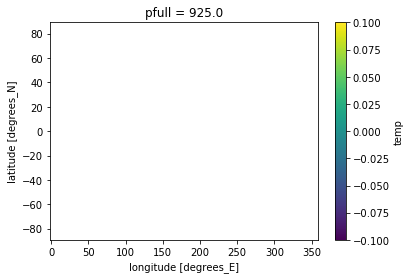

In [4]:
os.chdir("/scratch/w40/gp8431/run/r0_1101_srfamp_10.0")
#os.chdir("srfamp_10")
ih_for = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)

#ih_nofor_davg = ih_nofor.mean('time')
ih_for_davg = ih_for.mean('time')

#print(ih_for)
#print(ih_nofor)
# Remove method='nearest' command to test if this improves?
#print(ih_for.sel(pfull=925, method='nearest').temp)
#print(ih_nofor.sel(pfull=925, method='nearest').temp)
print(ih_for_davg.sel(pfull=925.0,method='nearest').temp)


#print(ih_nofor)

diff = ih_for_davg.sel(pfull=925, method='nearest').temp-ih_nofor_davg.sel(pfull=925, method='nearest').temp

diff.plot()
#print(diff)
# Change back into the original run directory to execute the remaining code
# (for now).
#os.chdir("/scratch/w40/gp8431/run")

In [5]:
# Open model dataset in current directory.
#xr.open_dataset("atmos_daily_nh.nc", decode_times = False).time

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


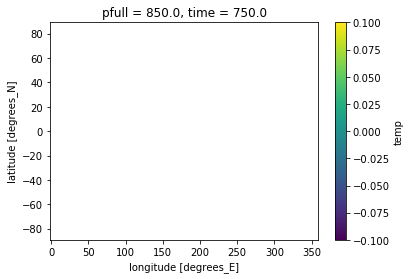

In [6]:
os.chdir("/scratch/w40/gp8431/run")
# Assign names to extracted model datasets and print these datasets.
# This is useful for checking that coordinates of different datasets 
# match up.
ih = xr.open_dataset("plevel_avg_ih.nc", decode_times = False)
nh = xr.open_dataset("plevel_avg_nh.nc", decode_times = False)

ihd = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
nhd = xr.open_dataset("plevel_daily_nh.nc", decode_times = False)

# The below variables are time-averaged such that they have no time 
# dimension.
ihd_avg = ihd.mean('time')
nhd_avg = nhd.mean('time')
# Compute the difference between  average vals (.h) and time-averaged 
# daily vals (.hd) to determine which variable should be used.
# Squeeze ih to remove the time dimension.
#ih = ih.squeeze()
#nh = nh.squeeze()

diff_ih = ihd_avg-ih
diff_nh = nhd_avg-nh
#print(diff_ih)
# Difference plots indicate some discrepancy between p_avg and time avg 
# of p_daily - use ihd_avg data for the below analysis because of this.
diff_ih.sel(pfull=850, method="nearest").temp.plot()

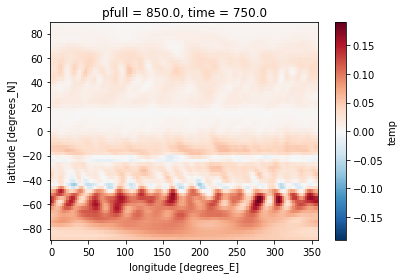

In [7]:
diff_nh.sel(pfull=850, method="nearest").temp.plot()

In [8]:
# Print the time coordinate from the ih dataset. 
#print(ih.time)

In [9]:
# Change attributes of the model datasets such as calendar type, start.
#ih.time.attrs["units"] = "days since 2020-12-20 00:00:00"
#ih.time.attrs["calendar"] = "noleap"
# Express time in 'true' date/time form based on input start date.
#xr.decode_cf(ih)

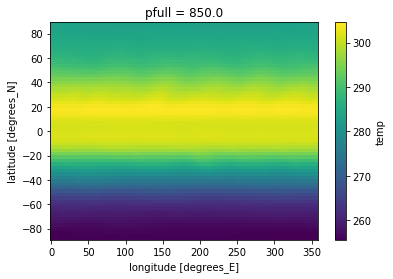

In [10]:
# Plot the time-averaged temperature variable from the extracted nh
# dataset at the pressure level closest to 850hPa.
#nh.mean("time").sel(pfull=850, method = "nearest").temp.plot()
nhd_avg.sel(pfull=850, method = "nearest").temp.plot()

In [11]:
#nh.mean("time").sel(pfull=850, method = "nearest").temp.plot()

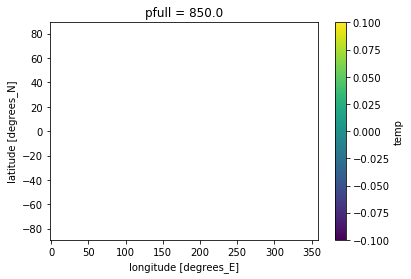

In [12]:
ihd_avg.sel(pfull=850, method = "nearest").temp.plot()
#ih.mean("time").sel(pfull=850, method = "nearest").temp.plot()

In [13]:
#ih.mean("time").sel(pfull=850, method = "nearest").temp.plot()

In [14]:
# Compute the time-averaged temperature difference at the given 
# pressure level between the cases of heating and no heating.
#(ih-nh).mean("time").sel(pfull=850, method = "nearest").temp.plot()
#print(ih)
#print(nh)

In [15]:
# Look at data in rt52 directory.
#os.listdir("/g/data/rt52/era5/pressure-levels/reanalysis/t/2019")
# Check access to aostools
#os.listdir("/g/data/w40/gp8431/code/aostools")

In [3]:
# Extract rt52 monthly-averaged data for a given month - this will only
# have one element in its time dimension, so use the 'squeeze' function
# to remove this time dimension.
era = xr.open_dataarray("/g/data/rt52/era5/pressure-levels/monthly-averaged//t/2019/t_era5_moda_pl_20190801-20190831.nc").squeeze()

In [9]:
era

<xarray.DataArray 't' (level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time       datetime64[ns] 2019-08-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

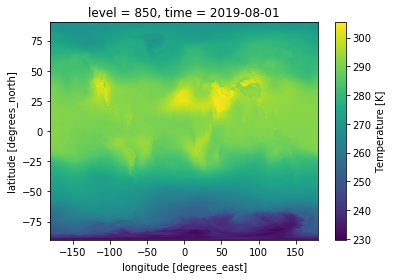

In [10]:
# Plot the era data exracted above.
# You can see the continents!
era.sel(level=850).plot()

In [19]:
# Rename variables in the era dataset so that it can be directly
# compared to the model.
era = era.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

In [20]:
os.chdir("/home/561/gp8431")
from climate import StandardGrid


In [21]:
# Print datasets for model data vs true data to check naming of 
# variables. 
#print(ih.mean("time"))
#print(era)

<xarray.DataArray 't' (lat: 64, lon: 128)>
array([[232.77001509, 233.04077172, 233.25524785, ...,          nan,
                 nan,          nan],
       [233.45397055, 232.63449118, 232.02868948, ...,          nan,
                 nan,          nan],
       [235.14454648, 235.54504657, 235.75724143, ...,          nan,
                 nan,          nan],
       ...,
       [270.90372028, 270.7538635 , 270.6127675 , ...,          nan,
                 nan,          nan],
       [270.20917594, 270.07765279, 269.96304782, ...,          nan,
                 nan,          nan],
       [269.95132125, 269.93787072, 269.93826294, ...,          nan,
                 nan,          nan]])
Coordinates:
    time     datetime64[ns] 2019-08-01
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
    pfull    float64 850.0
Attributes:
    units:          K
    long_name:      Temperature
    s

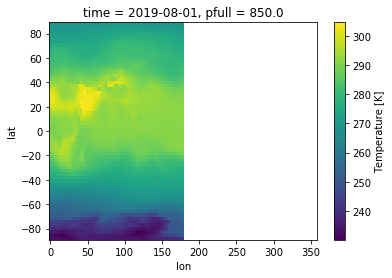

In [22]:
# Interpolate era data onto the coarser model grid (same for ih and nh)
from climate import StandardGrid
# The below line has an ac term related to importation - how to import?
#erai = ac.StandardGrid(era)

# Shift the longitude of era, then interpolate onto a coarser grid.
# This order produces a non-physical plot - redefine discontinuity?
#######erai = StandardGrid(era)
# For now, I will manually shift all longitude values rather than using
# the StandardGrid function.
# TEST AOSTOOLS
## era['lon'] = (era['lon'] + 180.0)
# If we define erai as StandardGrid(era), then the below line should read
# 'erai.interp_like...'
#erai = era.interp_like(ih.mean('time'))
#eran = era.interp_like(nh.mean('time'))
era_interp = era.interp_like(ihd_avg)

erai = era_interp

####erai = StandardGrid(era_interp ,lon_name='lon', lat_name='lat')

#eran = era.interp_like(nhd_avg)
#erai = StandardGrid(era)
# We could also try simply adding a value of 180 to the era longitude 
# before interpolation and comparing the result with the StandardGrid

# Plot!
erai.sel(pfull = 850).plot()
print(erai.sel(pfull = 850))
#eran.sel(pfull = 850).plot()
#print(erai_nh)
#print(nh.mean('time'))

## NOTE: era = SG(era) and plot returns correct long/lat

In [23]:
#eran.sel(pfull = 850).plot()
# We expect erai and eran to be identical as the spatial grids for the 
# cases of heating and no heating are identical

In [24]:
# Import glob to assist data extraction and file finding.
from glob import glob
import xarray as xr
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged//t/*/*')
files.sort()
# Add combine option based on error message.
era_all = xr.open_mfdataset(files, combine='by_coords')
era_clim = era_all.groupby('time.month').mean()
#print(era_all)

# Attempt to interpolate era_all onto coarser grid and change coordinate name to match model.
#era_all = era_all.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
#era_all['lon'] = (era_all['lon'] + 180.0)
#erai = era.interp_like(ihd_avg)

#print(era_all)

# Plotting issue?
#era_clim.sel(month=8,level=850).t.plot()
era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

# Attempt to interpolate era_anom onto coarser grid and change coordinate names to match model anomalies for comparison.
era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull", "t":"temp"})
era_anom['lon'] = (era_anom['lon'] + 180.0)


#print(era_clim)
print(era_anom)
#print(era_anom.mean('time'))

<xarray.Dataset>
Dimensions:  (lat: 721, lon: 1440, pfull: 37, time: 12)
Coordinates:
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    temp     (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>


In [25]:
# Model anomaly is difference between time average ihd_avg-nhd_avg
#mod_anom = ihd_avg-nhd_avg
mod_anom = ihd_avg-nhd_avg
era_anom_interp = era_anom.interp_like(mod_anom)
print(mod_anom)
#print(era_anom_interp)
# Select the era_anom data from August for the best comparison with perpet_day = 220 in the model.
era_anom_interp_aug = era_anom_interp.sel(time=slice('2019-08-01', '2019-08-31')).squeeze()
print(era_anom_interp_aug)

<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lon: 128, lonb: 129, pfull: 17)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 ... 350.2 353.0 355.8 358.6
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 ... 83.76 86.58 90.0
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Data variables:
    hght     (pfull, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ps       (lat, lon) float32 -1382.0391 -1386.8594 ... 500.3672 499.1875
    ucomp    (pfull, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    vcomp    (pfull, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    temp     (pfull, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, pfull: 17)
Coordinates:
    time     datetime64[ns] 20

<xarray.DataArray 'temp' (pfull: 17, lat: 64, lon: 128)>
dask.array<subtract, shape=(17, 64, 128), dtype=float32, chunksize=(17, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
    time     datetime64[ns] 2019-08-01
    month    int64 8


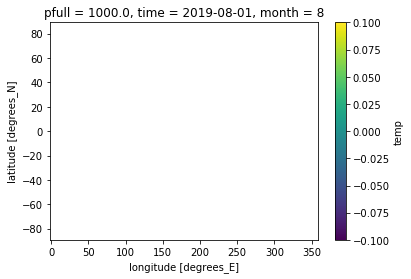

In [26]:
# In this cell, I will compute the difference in temperature between model output and era data at the highest pressure level (lowest altitude).
mod_anom_surf = mod_anom.sel(pfull=1000, method='nearest')
era_anom_interp_aug_surf = era_anom_interp_aug.sel(pfull=1000,method='nearest')
# I will also compute the difference at the next highest pressure level (just above the surface) - this could be more correct.
#temp_diff = mod_anom_surf-era_anom_interp_aug_surf
#print(mod_anom_surf)
#print(era_anom_interp_aug_surf)
temp_diff = mod_anom-era_anom_interp_aug
print(temp_diff.temp)
temp_diff.sel(pfull=1000, method='nearest').temp.plot()

In [27]:
#temp_diff.sel(pfull=925, method='nearest').temp.plot()

In [28]:
# Run top two cells and StandardGrid cell before running this one.
# This cell will extract era data and srfamp = 10.0 model values, then 
# compute the anomaly for each, and the difference in anomaly.


# Extract model output (no heating and heating = 10.0)
os.chdir("/scratch/w40/gp8431/run/r0_1101_srfamp_10.0")
ih_for = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
ih_for_davg = ih_for.mean('time')

os.chdir("/scratch/w40/gp8431/run/r0_1101_srfamp_0.0")
nh_for = xr.open_dataset("plevel_daily_ih.nc", decode_times = False)
nh_for_davg = nh_for.mean('time')

# Compute anomaly based on extracted model values.
mod_anom = ih_for_davg-nh_for_davg

# Extract era data

# Import glob to assist data extraction and file finding.
from glob import glob
import xarray as xr
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged//t/*/*')
files.sort()
# Add combine option based on error message.
era_all = xr.open_mfdataset(files, combine='by_coords')
era_clim = era_all.groupby('time.month').mean()
#print(era_all)

# Attempt to interpolate era_all onto coarser grid and change coordinate name to match model.
#era_all = era_all.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
#era_all['lon'] = (era_all['lon'] + 180.0)
#erai = era.interp_like(ihd_avg)

#print(era_all)

# Plotting issue?
#era_clim.sel(month=8,level=850).t.plot()
era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

# Attempt to interpolate era_anom onto coarser grid and change coordinate names to match model anomalies for comparison.
era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull", "t":"temp"})
era_anom['lon'] = (era_anom['lon'] + 180.0)

era_anom_interp = era_anom.interp_like(mod_anom)
#print(era_anom_interp)
# CHANGE THIS!
# Select the era_anom data from August for the best comparison with perpet_day = 220 in the model.
era_anom_interp_aug = era_anom_interp.sel(time=slice('2019-08-01', '2019-08-31')).squeeze()
print(era_anom_interp_aug)



# Compute the difference in anomalies between the model and the data.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, pfull: 17)
Coordinates:
    time     datetime64[ns] 2019-08-01
    month    int64 8
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * pfull    (pfull) float64 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Data variables:
    temp     (pfull, lat, lon) float32 dask.array<chunksize=(17, 64, 128), meta=np.ndarray>


In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x145927ad3bf8> (for post_execute):


URLError: <urlopen error [Errno 110] Connection timed out>

URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 432x288 with 1 Axes>